In [29]:
import numpy as np

In [15]:
#URL = "https://aspm.faa.gov/opsnet/sys/opsnet-server-x.asp"

In [1]:
#URL ="https://data.cityofchicago.org/api/views/dfnk-7re6/rows.csv?accessType=DOWNLOAD"

In [1]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
import urllib

In [3]:
import urllib.request

In [4]:
#urllib.request.urlretrieve(URL, 'Chicagotraffic.csv')

('Chicagotraffic.csv', <http.client.HTTPMessage at 0x7f4e1c50e0b8>)

In [4]:
urllib.request.urlretrieve(URL, 'fremont.csv')

('fremont.csv', <http.client.HTTPMessage at 0x7fbc48088fd0>)

In [19]:
#urlretrieve(URL,'Chicagotraffic.csv')

In [6]:
!head fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
02/24/2015 02:00:00 AM,3,3
01/01/2019 12:00:00 AM,0,9
01/01/2019 01:00:00 AM,2,22
02/15/2016 12:00:00 AM,3,3
01/01/2019 02:00:00 AM,1,11
01/01/2019 03:00:00 AM,1,2
01/01/2019 04:00:00 AM,2,1
01/01/2019 05:00:00 AM,3,1
01/01/2019 06:00:00 AM,4,7


In [9]:
import pandas as pd
data = pd.read_csv('fremont.csv', parse_dates=True, index_col='Date')
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


In [ ]:
#pip install pandas

In [15]:
#import pandas as pd
#data = pd.read_csv('Chicagotraffic.csv', parse_dates=True)
#data.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,...,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,JC126627,11/21/2018 02:23:00 AM,003XX N HALSTED ST,0890,THEFT,FROM BUILDING,APARTMENT,N,N,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JB478833,09/05/2018 12:16:00 PM,076XX W PETERSON AVE,0820,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,N,N,1612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC144008,11/13/2018 12:00:00 PM,087XX S STATE ST,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,N,N,632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC219246,04/09/2019 04:45:00 PM,0000X N STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,N,N,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JC185262,12/22/2018 01:55:00 PM,065XX S COTTAGE GROVE AVE,0890,THEFT,FROM BUILDING,RESTAURANT,N,N,321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.shape


(59832, 2)

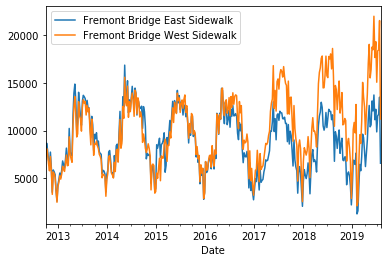

In [13]:
%matplotlib inline
data.resample('W').sum().plot()

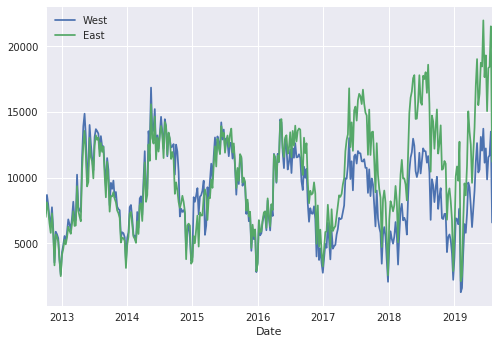

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ('West','East')
data.resample('W').sum().plot()

(0, 1373382.8)

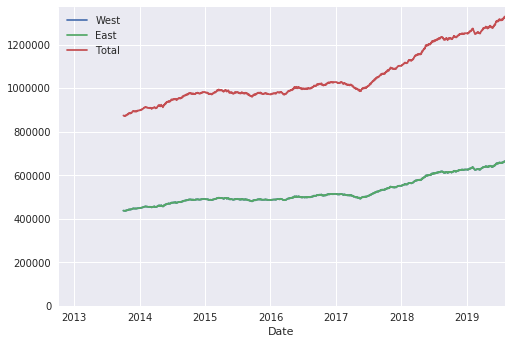

In [24]:
data['Total'] = data['West'] + data['East']
ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

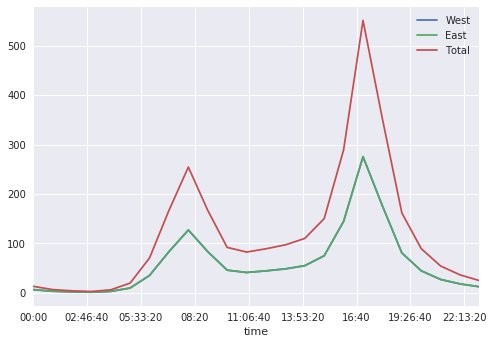

In [23]:
data.groupby(data.index.time).mean().plot();


In [27]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,18.0,22.0,14.0,14.0,10.0
01:00:00,12.0,0.0,8.0,10.0,10.0
02:00:00,2.0,12.0,6.0,4.0,2.0
03:00:00,6.0,6.0,4.0,4.0,4.0
04:00:00,2.0,2.0,4.0,2.0,4.0


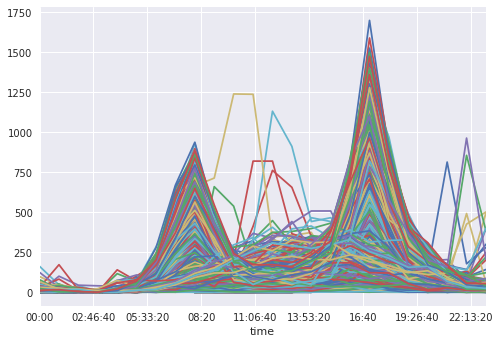

In [28]:
pivoted.plot(legend=False);
